In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helperfunction as hf 
import seaborn as sns 
%matplotlib inline

In [2]:
file_path = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_06_03_19/master/module_1/week_3_project/data/tmdb.movies.csv.gz'
tmdb = pd.read_csv(file_path, index_col = 0, parse_dates = ['release_date'])

In [3]:
tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
tmdb = tmdb[tmdb.original_language == 'en']  # only choose en

In [4]:
tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
# load in profit data to merge 
profit = pd.read_pickle('movie_profit_info.pkl')

In [6]:
hf.rename_columns(profit, {'movie': 'original_title'})

In [7]:
# merge with original_title 
merged_df = hf.merge_tables(profit, tmdb, 'original_title', how = 'inner')

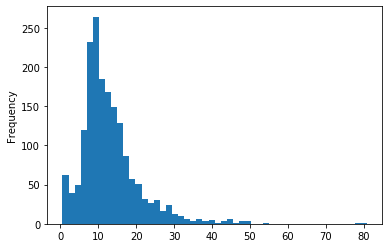

In [17]:
merged_df.popularity.plot.hist(bins = 50)

In [66]:
merged_df.popularity.describe()

count    1968.000000
mean       11.714480
std         8.350994
min         0.600000
25%         7.096000
50%        10.442500
75%        15.390000
max        80.773000
Name: popularity, dtype: float64

In [10]:
merged_df = merged_df[~(merged_df.domestic_gross==0)]

In [9]:
merged_df = merged_df[~(merged_df.worldwide_gross==0)]

In [11]:
merged_df.head()

,id_x,release_date_x,original_title,production_budget,domestic_gross,worldwide_gross,domestic_profit_percent,worldwide_profit_percent,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,44.116274,84.692106,"[28, 12, 14, 878]",19995,en,26.526,2009-12-18,Avatar,7.4,18676
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-70.328300,60.733080,"[12, 28, 14]",1865,en,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
2,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,27.974777,76.436443,"[28, 12, 878]",99861,en,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457
3,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,55.805369,85.352522,"[12, 28, 14]",299536,en,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
4,9,2017-11-17,Justice League,300000000,229024295,655945209,-30.990470,54.264473,"[28, 12, 14, 878]",141052,en,34.953,2017-11-17,Justice League,6.2,7510


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


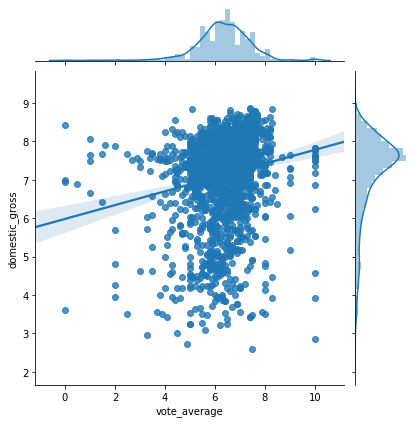

In [53]:
sns.jointplot(merged_df['vote_average'], np.log10(merged_df['domestic_gross']), kind="reg")

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


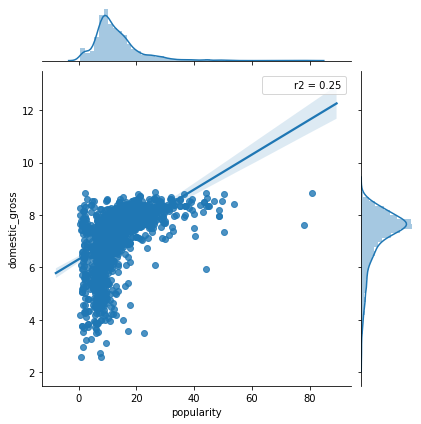

In [15]:
import seaborn as sns
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(merged_df['popularity'], np.log10(merged_df['domestic_gross']), kind="reg", stat_func=r2)

In [ ]:
# popularity has stronger correlation with gross sales domestic or worldwide than the average vote, we will use popularity

In [67]:
merged_df[merged_df.popularity < 1]  # get rid of voting count less than 20

,id_x,release_date_x,original_title,production_budget,domestic_gross,worldwide_gross,domestic_profit_percent,worldwide_profit_percent,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count
42,51,2010-03-05,Alice in Wonderland,200000000,334191110,1025491110,40.154003,80.497149,[],423971,en,0.600,2010-01-01,Alice in Wonderland,6.0,1
63,75,2008-07-18,The Dark Knight,185000000,533720947,1001996207,65.337692,81.536856,"[28, 80, 18, 53]",72003,en,0.600,2011-07-11,The Dark Knight,6.6,5
172,36,2005-06-29,War of the Worlds,132000000,234280354,606836535,43.657248,78.247849,[99],418931,en,0.600,2013-10-29,War of the Worlds,7.1,5
178,44,2015-03-27,Home,130000000,177397510,385997896,26.718250,66.321060,[],237303,en,0.840,2013-11-22,Home,7.0,2
180,44,2015-03-27,Home,130000000,177397510,385997896,26.718250,66.321060,[],409371,en,0.672,2016-08-01,Home,7.0,1
181,44,2015-03-27,Home,130000000,177397510,385997896,26.718250,66.321060,"[27, 18, 10751]",381507,en,0.600,2016-03-01,Home,4.7,14
182,44,2015-03-27,Home,130000000,177397510,385997896,26.718250,66.321060,[18],388223,en,0.600,2016-03-17,Home,4.5,2
183,44,2015-03-27,Home,130000000,177397510,385997896,26.718250,66.321060,[878],496256,en,0.600,2017-04-30,Home,4.0,1
184,60,2009-04-23,Home,500000,15433,44793168,-3139.810795,98.883758,[],237303,en,0.840,2013-11-22,Home,7.0,2
186,60,2009-04-23,Home,500000,15433,44793168,-3139.810795,98.883758,[],409371,en,0.672,2016-08-01,Home,7.0,1


In [12]:
merged_df = merged_df[~(merged_df.vote_count < 10)]  # get rid of count less than 10

In [119]:
tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [120]:
genre_map = {"genres": [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 16, "name": "Animation"}, {"id": 35, "name": "Comedy"}, {"id": 80, "name": "Crime"}, {"id": 99, "name": "Documentary"}, {"id": 18, "name": "Drama"}, {"id": 10751, "name": "Family"}, {"id": 14, "name": "Fantasy"}, {
    "id": 36, "name": "History"}, {"id": 27, "name": "Horror"}, {"id": 10402, "name": "Music"}, {"id": 9648, "name": "Mystery"}, {"id": 10749, "name": "Romance"}, {"id": 878, "name": "Science Fiction"}, {"id": 10770, "name": "TV Movie"}, {"id": 53, "name": "Thriller"}, {"id": 10752, "name": "War"}, {"id": 37, "name": "Western"}]}

In [138]:
genre_dict = {}
for genre in genre_map['genres']:
    genre_dict[genre['id']] = genre['name']
print(genre_dict)

{28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


In [124]:
table = str.maketrans(dict.fromkeys('[]'))
tmdb.genre_ids = tmdb.genre_ids.dropna().apply(lambda x: x.translate(table))

In [129]:
genres = tmdb[['genre_ids','id']]
series = [pd.Series(row['id'],row['genre_ids'].split(','))
    for _,row in genres.iterrows()]
table = pd.concat(series).reset_index()

In [133]:
table.rename(columns={'index':'genre', 0:'id'}, inplace= True)

In [153]:
table.genre = table.genre.str.strip()

In [154]:
table = table[~(table.genre == '')]

In [160]:
table.genre = table.genre.astype(int)

In [163]:
table.genre.dtype

dtype('int64')

In [169]:
table = table.set_index('id').applymap(lambda x: genre_dict.get(x, np.nan))

In [172]:
genre_popularity = tmdb.merge(table.reset_index(), on = 'id', how = 'inner')

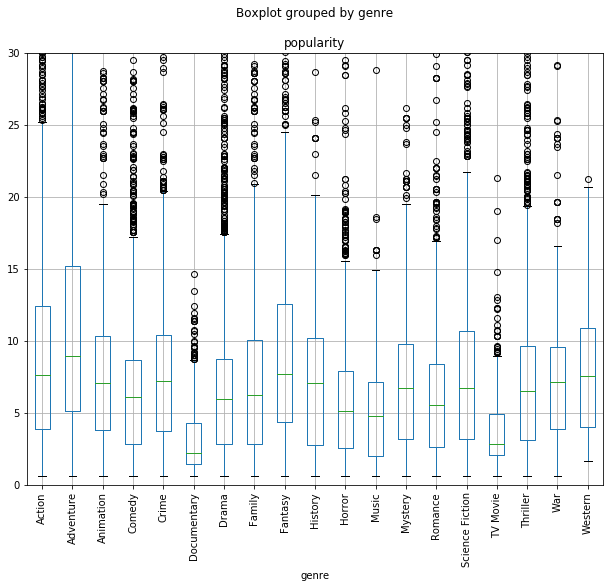

In [200]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
genre_popularity.boxplot(column=['popularity'], by='genre', ax = ax)
plt.xticks(rotation=90)
plt.ylim([0,30])
plt.show()

In [206]:
# filter before 2009 
genre_popularity['month'] = genre_popularity.release_date.dt.month

In [220]:
genre_month_popularity = genre_popularity[genre_popularity.release_date > '2009-1-1'].groupby(['genre','month']).popularity.mean().reset_index()

In [255]:
genre_month_popularity = genre_month_popularity.pivot(index = 'month',columns = 'genre', values='popularity')

KeyError: 'month'

In [252]:
genre_month_popularity.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
genre,,,,,,,,,,,,
Action,8.380662,9.837049,8.246007,7.734866,10.324688,8.799397,10.382200,9.160426,9.059135,9.510307,12.598551,11.501873
Adventure,7.462806,10.529468,11.176840,9.803045,14.000239,10.964436,11.295293,10.708551,8.310507,9.064616,17.437350,14.142550
Animation,7.709609,7.574387,8.087222,9.387205,5.917289,10.561044,8.440054,7.434633,7.291348,6.105988,10.089267,8.042632
Comedy,5.786661,7.015213,5.999875,6.054913,6.972730,6.965972,7.154431,6.856458,6.318791,5.725315,7.631804,7.589248
Crime,7.380883,7.680000,7.248931,6.994307,7.326925,6.352139,7.928218,9.442148,9.527893,7.843341,9.041643,9.786130


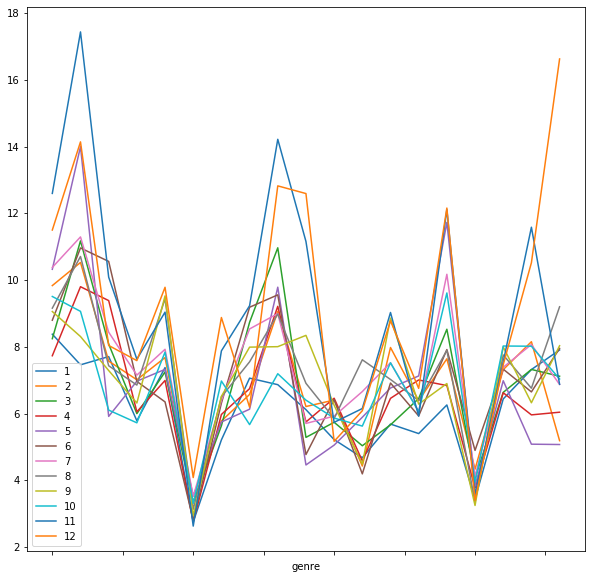

In [254]:
genre_month_popularity.plot(figsize = (10,10), label = genre_month_popularity.columns)
plt.legend(loc = 'lower left')
plt.

In [229]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
import pandas as pd
import numpy as np

cf.set_config_file(offline = True, theme = 'ggplot')

df = cf.

# data = [
#     go.Scatter(
#         x=df['x'], # assign x as the dataframe column 'x'
#         y=df['y']
#     )
# ]
# # IPython notebook
# # py.iplot(data, filename='pandas/basic-line-plot')

# url = py.plot(data, filename='pandas/basic-line-plot')

In [143]:
table.set_index('id')

dtype('O')

In [73]:
# we decided that popularity is tmdb is the best proxy for gross revenue we will use dmdb database using popularity
# imdb data 
writers = pd.read_pickle('writers_title.pkl')
directors = pd.read_pickle('directors_title.pkl')

In [75]:
directors.head()

,tconst,directors,num_known_director,num_known_actor_actress,num_known_writer,num_region,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0285252,Tony Vitale,1,4,0,4,Life's a Beach,Life's a Beach,2012,100.0,Comedy
1,tt0462036,Bill Haley,0,3,0,1,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,2012,110.0,Drama
2,tt0835418,Jay Chandrasekhar,1,4,2,12,The Babymakers,The Babymakers,2012,95.0,Comedy
3,tt0878654,Albert Pyun,2,4,1,3,Bulletface,Bulletface,2010,82.0,Thriller
4,tt0878654,Joe Baile,2,4,1,3,Bulletface,Bulletface,2010,82.0,Thriller


In [74]:
# keep vote count above 10 
tmdb = tmdb[tmdb.vote_count>=10]

In [77]:
# directors first
merged_directors_tmdb = tmdb.merge(directors, on = 'original_title', how = 'inner')

In [88]:
directors_count = merged_directors_tmdb.groupby('directors').size().sort_values(ascending = False).reset_index()

In [89]:
merged_directors_count = directors_count.merge(merged_directors_tmdb, on = 'directors',how = 'inner')

In [110]:
merged_directors_count.head()

,directors,0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,tconst,num_known_director,num_known_actor_actress,num_known_writer,num_region,primary_title,start_year,runtime_minutes,genres
0,James Franco,14,"[35, 99]",295069,en,Saturday Night,1.404,2010-05-02,Saturday Night,8.3,12,tt1580427,1,0,0,1,Saturday Night,2010,90.0,Documentary
1,James Franco,14,"[18, 36]",83728,en,The Broken Tower,2.149,2012-04-27,The Broken Tower,6.3,12,tt1756791,0,3,0,3,The Broken Tower,2011,99.0,"Biography,Drama,History"
2,James Franco,14,"[18, 36]",83728,en,The Broken Tower,2.149,2012-04-27,The Broken Tower,6.3,12,tt1756791,0,3,0,3,The Broken Tower,2011,99.0,"Biography,Drama,History"
3,James Franco,14,[18],152745,en,As I Lay Dying,4.835,2013-10-11,As I Lay Dying,5.7,34,tt1807944,0,4,2,10,As I Lay Dying,2013,110.0,Drama
4,James Franco,14,[18],158936,en,Interior. Leather Bar.,1.778,2013-01-18,Interior. Leather Bar.,5.6,30,tt2352488,0,4,0,5,Interior. Leather Bar.,2013,60.0,Drama


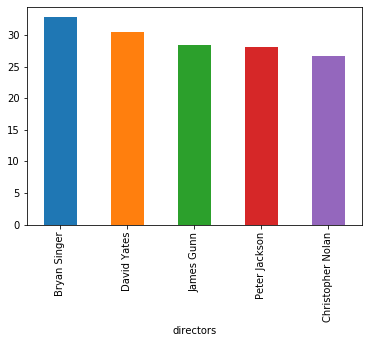

In [118]:
# remove 1
merged_directors_count[(merged_directors_count[0] > 3) & (merged_directors_count.start_year >= 2009)].groupby(
    'directors')['popularity'].mean().sort_values(ascending=False)[:5].plot.bar()

In [101]:
# remove brackets 
merged_writers_tmdb = tmdb.merge(writers, on = 'original_title', how = 'inner')


In [102]:
writers_count = merged_writers_tmdb.groupby('writers').size().sort_values(ascending = False).reset_index()

In [105]:
writers_count.head()

,writers,0
0,William Shakespeare,24
1,Jack Kirby,21
2,Stan Lee,20
3,Mark Monroe,16
4,Stephen King,14


In [106]:
merged_writers_count = writers_count.merge(merged_writers_tmdb, on = 'writers',how = 'inner')

In [108]:
merged_writers_count[0].describe()

count    16583.000000
mean         2.315685
std          2.220946
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         24.000000
Name: 0, dtype: float64

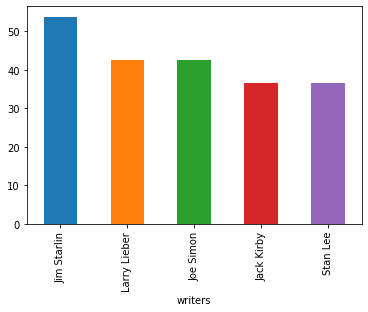

In [117]:
merged_writers_count[(merged_writers_count[0] > 3)&(merged_writers_count.start_year >=2009)].groupby(
    'writers')['popularity'].mean().sort_values(ascending=False)[:5].plot.bar()

In [238]:
tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"12, 14, 10751",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"14, 12, 16, 10751",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"12, 28, 878",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"16, 35, 10751",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"28, 878, 12",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [239]:
imdb_nosplitgenre = pd.read_pickle('imdb_nosplitgenre.pkl')

In [246]:
imdb_nosplitgenre.merge(tmdb,on = 'original_title', how = 'inner').groupby('runtime_minutes').popularity.mean().sort_values(ascending = False)[:5]

runtime_minutes
149.0    55.994000
164.0    31.682000
144.0    21.351000
136.0    19.859400
143.0    19.307833
147.0    17.334143
9.0      16.730000
141.0    16.163286
169.0    16.143500
180.0    15.498500
148.0    15.080273
140.0    15.072125
172.0    14.681000
134.0    14.298179
165.0    14.270600
247.0    14.173000
133.0    14.043407
132.0    14.011091
137.0    13.877235
146.0    13.453800
156.0    13.391000
130.0    13.370744
53.0     13.346667
139.0    12.880583
168.0    12.630000
142.0    12.522400
5.0      12.349000
Name: popularity, dtype: float64

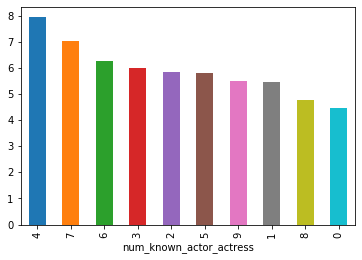

In [265]:
imdb_nosplitgenre.merge(tmdb, on='original_title', how='inner').groupby(
    'num_known_actor_actress').popularity.mean().sort_values(ascending = False)bb.plot.bar()

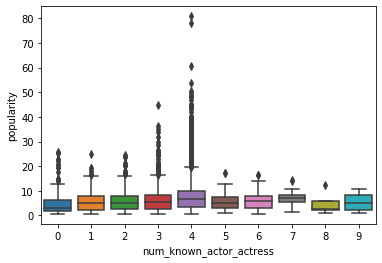

In [266]:
sns.boxplot(x = 'num_known_actor_actress', y = 'popularity', data = imdb_nosplitgenre.merge(tmdb, on='original_title', how='inner'))